# Part -1 (CNN)

In [45]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import os
import cv2
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout,AveragePooling2D
from tensorflow.keras.utils import to_categorical

In [46]:
image_size= 200

path1=r"C:\Users\Lenovo\Desktop\data science\Deep learning images\EXAM deep-learninh\Shoe Classification\train"
cate=['Boots', 'Sandals','Slippers']
input_image =[]
for i in cate :
    folder = os.path.join(path1,i)
    label = cate.index(i)
    for image in os.listdir(folder):
        image_path = os.path.join(folder,image)
        image_array = cv2.imread(image_path)
        image_array = cv2.resize(image_array,(image_size , image_size))
        input_image.append([image_array, label])

In [47]:
len(input_image)

778

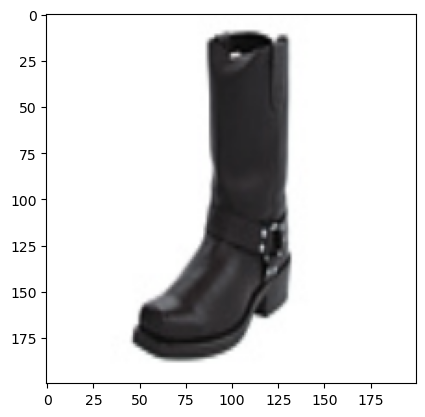

In [48]:
plt.imshow(input_image[0][0])

In [49]:
# take 80% as train and 20% as test
# it is random sampling

In [50]:
np.random.shuffle(input_image)

In [51]:
x=[]
y=[]
for x_values,labels in input_image:
    x.append(x_values)
    y.append(labels)

In [52]:
x = np.array(x)
y = np.array(y)

In [53]:
x.max()

255

In [54]:
y

array([0, 1, 2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 2, 0,
       0, 1, 2, 0, 1, 1, 2, 1, 0, 2, 2, 2, 2, 0, 1, 2, 0, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 2, 2, 0, 2, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       2, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, 0, 2, 1, 1, 0, 1, 1, 2, 2,
       2, 1, 1, 2, 2, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 2, 2, 0, 0, 0, 2,
       0, 0, 0, 2, 0, 2, 1, 0, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 1, 0, 1, 2,
       2, 0, 0, 1, 0, 0, 1, 1, 2, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 2, 2,
       0, 0, 2, 0, 1, 2, 1, 0, 0, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 1, 0, 2, 2, 1, 1, 0, 1, 1, 0,
       2, 2, 1, 1, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       2, 1, 1, 0, 1, 1, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 1, 0, 0, 0, 1, 2,
       0, 1, 0, 0, 2, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 2, 1, 1, 2, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2,
       1, 0, 0, 1, 1, 1, 0, 1, 2, 0, 1, 0, 2, 2, 0,

In [55]:
x_train = x[0:622]
y_train = y[0:622]

x_test = x[622:]
y_test = y[622:]

In [56]:
x_train = x_train/255
x_test = x_test/255

In [57]:
model = Sequential()

model.add(Conv2D(filters = 18, kernel_size=(5,5),activation="relu"))
model.add(AveragePooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation="relu",input_shape = x.shape[1:]))
model.add(Dense(128,activation="relu",input_shape = x.shape[1:]))

model.add(Dense(3,activation="softmax"))

model.compile(optimizer='adam' ,loss ='sparse_categorical_crossentropy' , metrics=['accuracy'])

In [58]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
20/20 [==============================] - 10s 450ms/step - loss: 2.8942 - accuracy: 0.5338
Epoch 2/10
20/20 [==============================] - 9s 458ms/step - loss: 0.4680 - accuracy: 0.8376
Epoch 3/10
20/20 [==============================] - 11s 526ms/step - loss: 0.2002 - accuracy: 0.9341
Epoch 4/10
20/20 [==============================] - 10s 518ms/step - loss: 0.1103 - accuracy: 0.9743
Epoch 5/10
20/20 [==============================] - 10s 524ms/step - loss: 0.0673 - accuracy: 0.9887
Epoch 6/10
20/20 [==============================] - 10s 514ms/step - loss: 0.1412 - accuracy: 0.9711
Epoch 7/10
20/20 [==============================] - 10s 519ms/step - loss: 0.1379 - accuracy: 0.9695
Epoch 8/10
20/20 [==============================] - 10s 522ms/step - loss: 0.2334 - accuracy: 0.9277
Epoch 9/10
20/20 [==============================] - 11s 532ms/step - loss: 0.1053 - accuracy: 0.9759
Epoch 10/10
20/20 [==============================] - 11s 525ms/step - loss: 0.0377 - accurac

In [59]:
pred =model.predict(x_train)

20/20 [==============================] - 3s 129ms/step


In [60]:
final_pred = pred.argmax(axis=1)

In [61]:
from sklearn.metrics import classification_report,confusion_matrix

In [62]:
tab = confusion_matrix(y_train,final_pred)
tab

array([[263,   0,   0],
       [  1, 239,   0],
       [  0,   0, 119]], dtype=int64)

In [69]:
tab.diagonal().sum()/tab.sum()*100

99.83922829581994

In [70]:
print(classification_report(y_train,final_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       263
           1       1.00      1.00      1.00       240
           2       1.00      1.00      1.00       119

    accuracy                           1.00       622
   macro avg       1.00      1.00      1.00       622
weighted avg       1.00      1.00      1.00       622



# On train model Accuracy is 99% 

In [71]:
pred_test=  model.predict(x_test)
final_pred_test = pred_test.argmax(axis=1)

5/5 [==============================] - 0s 85ms/step


In [72]:
tab1= confusion_matrix(y_test,final_pred_test)
tab1

array([[56,  6,  1],
       [ 1, 57,  8],
       [ 0,  2, 25]], dtype=int64)

In [73]:
 tab1.diagonal().sum()/tab1.sum()*100

88.46153846153845

In [74]:
print(classification_report(y_test,final_pred_test))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93        63
           1       0.88      0.86      0.87        66
           2       0.74      0.93      0.82        27

    accuracy                           0.88       156
   macro avg       0.86      0.89      0.87       156
weighted avg       0.90      0.88      0.89       156



# On test model Accuracy is 88%

In [76]:
image_size=200
image_test_path = r"C:\Users\Lenovo\Desktop\data science\Deep learning images\EXAM deep-learninh\Shoe Classification\test"
input_test_image = []
for image in os.listdir(image_test_path):
    image_path = os.path.join(image_test_path , image)
    img_test_array = cv2.imread(image_path)
    img_test_array = cv2.resize(img_test_array , (image_size , image_size))
    input_test_image.append(img_test_array)

In [77]:
input_test_image = np.array(input_test_image)
input_test_image = input_test_image/255

In [78]:
test_pred = model.predict(input_test_image)
test_pred = test_pred.argmax(axis=1)

3/3 [==============================] - 0s 79ms/step


In [79]:
test_pred

array([1, 1, 0, 2, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2,
       2], dtype=int64)

# part-2(RNN)

In [80]:
import pandas as pd
import numpy as np
from keras.layers import Dense, LSTM, Embedding
from keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN

from tensorflow.keras.utils import to_categorical

In [81]:
df=pd.read_csv(r"C:\Users\Lenovo\Desktop\data science\Deep learning images\EXAM deep-learninh\Tweets.csv")

In [82]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [83]:
df.airline_sentiment.value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [84]:
df.airline_sentiment.replace({'negative':0,'neutral':1,'positive':2}, inplace = True)
df.airline_sentiment.value_counts()

0    9178
1    3099
2    2363
Name: airline_sentiment, dtype: int64

In [85]:
x= df.iloc[:,10]
y= df.iloc[:,1]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [86]:
y_train = to_categorical(y_train)

In [87]:
max_num_words = 40000
seq_len = 200
embedding_size= 100

In [88]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [89]:
tokenizer = Tokenizer(num_words= max_num_words)
tokenizer.fit_on_texts(df.text)
x_train = tokenizer.texts_to_sequences(x_train) 
x_train = pad_sequences(x_train, maxlen= seq_len) 

x_test = tokenizer.texts_to_sequences(x_test)
x_test = pad_sequences(x_test, maxlen= seq_len) 

model = Sequential() 
model.add(Embedding(input_dim= max_num_words,
                   input_length= seq_len,
                   output_dim = embedding_size))

In [90]:
model.add(SimpleRNN(10))
model.add(Dense(3, activation='softmax'))
from tensorflow.keras.optimizers import Adam
adam = Adam(learning_rate = 0.001)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [91]:
model.fit(x_train, y_train, epochs = 5, batch_size = 32, validation_split = 0.2)

Epoch 1/5
293/293 [==============================] - 20s 66ms/step - loss: 0.8054 - accuracy: 0.6703 - val_loss: 0.6797 - val_accuracy: 0.7111
Epoch 2/5
293/293 [==============================] - 21s 70ms/step - loss: 0.4601 - accuracy: 0.8324 - val_loss: 0.6763 - val_accuracy: 0.7307
Epoch 3/5
293/293 [==============================] - 21s 71ms/step - loss: 0.2240 - accuracy: 0.9382 - val_loss: 0.7397 - val_accuracy: 0.7051
Epoch 4/5
293/293 [==============================] - 21s 72ms/step - loss: 0.1085 - accuracy: 0.9743 - val_loss: 0.8292 - val_accuracy: 0.7068
Epoch 5/5
293/293 [==============================] - 21s 72ms/step - loss: 0.0596 - accuracy: 0.9874 - val_loss: 0.9127 - val_accuracy: 0.7068


In [92]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [93]:
pred_test = model.predict(x_test)
pred_test = pred_test.argmax(axis = 1)

92/92 [==============================] - 1s 10ms/step


In [94]:
confusion_matrix(y_test, pred_test)

array([[1588,  150,   88],
       [ 233,  251,  129],
       [ 103,  134,  252]], dtype=int64)

In [95]:
accuracy_score(y_test, pred_test)

0.7141393442622951